In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_data = pd.read_pickle('df_data-pkl')

In [32]:
df_PT = df_data[(df_data['job_country'] == 'Portugal')]

In [33]:
df_skills = df_PT.explode('job_skills')
df_skills[['job_title','job_skills']]

,job_title,job_skills
344,Data Analyst,sql
344,Data Analyst,excel
398,Software Engineer,python
398,Software Engineer,sql
398,Software Engineer,gcp
...,...,...
785541,DevSecOps Engineer Senior,github
785541,DevSecOps Engineer Senior,gitlab
785559,Senior Splunk Engineer,shell
785559,Senior Splunk Engineer,linux


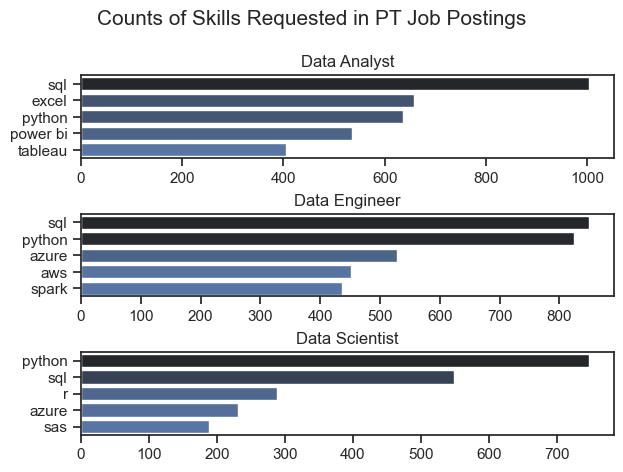

In [43]:
# Group by job_skills and job_title_short and count the number of occurrences
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

# Name the count column as count
df_skills_count = df_skills_count.reset_index(name='skill_count')

# Sort the values by skill_count in descending order
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)[::-1]
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()

fig.suptitle('Counts of Skills Requested in PT Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()

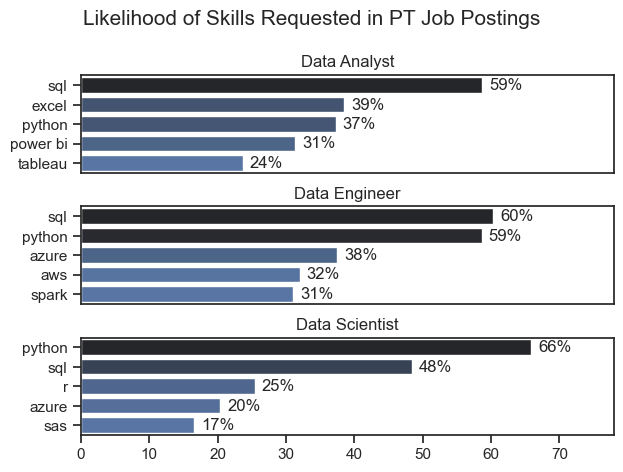

In [44]:
df_job_title_count = df_PT['job_title_short'].value_counts().reset_index(name='jobs_total')

df_skills_perc = pd.merge(df_skills_count, df_job_title_count, on='job_title_short', how='left')

df_skills_perc['skill_percent'] = (df_skills_perc['skill_count'] / df_skills_perc['jobs_total']) * 100


fig, ax = plt.subplots(len(job_titles), 1)


for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78)
    # remove the x-axis tick labels for better readability
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

    # label the percentage on the bars
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle('Likelihood of Skills Requested in PT Job Postings', fontsize=15)
fig.tight_layout(h_pad=.8)
plt.show()
